# Configuring pandas

In [3]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date



# The pandas Series

In [3]:
# create a four item Series
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
# get value at label 1
s[1]

2

In [7]:
# return a Series with the row with labels 1 and 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [5]:
# create a series using an explicit index
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
# look up items the series having index 'a' and 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [7]:
# passing a list of integers to a Series that has
# non-integer index labels will look up based upon
# 0-based index like an array
s[[1, 2]]

b    2
c    3
dtype: int64

In [8]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [11]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
# create a Series with values (representing temperatures)
# for each date in the index
temps1 = pd.Series([37, 38, 32, 34, 39, 31], 
                   index = dates)
temps1

2016-04-01    37
2016-04-02    38
2016-04-03    32
2016-04-04    34
2016-04-05    39
2016-04-06    31
Freq: D, dtype: int64

In [13]:
# what's the temperation for 2016-4-4?
temps1['2016-04-04']

34

In [16]:
# create a second series of values using the same index
temps2 = pd.Series([43, 35, 46, 40, 38, 39], 
                   index = dates)
# the following aligns the two by their index values
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2016-04-01    -6
2016-04-02     3
2016-04-03   -14
2016-04-04    -6
2016-04-05     1
2016-04-06    -8
Freq: D, dtype: int64

In [17]:
# and also possible by integer position as if the 
# series was an array
temp_diffs[2]

-14

In [18]:
# calculate the mean of the values in the Series
temp_diffs.mean()

-5.0

# The pandas DataFrame

In [17]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = pd.DataFrame(
            {'Chennai': temps1, 
             'Mumbai': temps2})
temps_df

,Chennai,Mumbai
2016-04-01,37,43
2016-04-02,38,35
2016-04-03,32,46
2016-04-04,34,40
2016-04-05,39,38
2016-04-06,31,39


In [20]:
# get the column with the name Missoula
temps_df['Chennai']

2016-04-01    37
2016-04-02    38
2016-04-03    32
2016-04-04    34
2016-04-05    39
2016-04-06    31
Freq: D, Name: Chennai, dtype: int64

In [22]:
# return both columns in a different order
temps_df[['Chennai', 'Mumbai']]

            Chennai  Mumbai
2016-04-01       37      43
2016-04-02       38      35
2016-04-03       32      46
2016-04-04       34      40
2016-04-05       39      38
2016-04-06       31      39

In [23]:
# retrieve the Missoula column through property syntax
temps_df.Chennai

2016-04-01    37
2016-04-02    38
2016-04-03    32
2016-04-04    34
2016-04-05    39
2016-04-06    31
Freq: D, Name: Chennai, dtype: int64

In [24]:
# calculate the temperature difference between the two cities
temps_df.Chennai - temps_df.Mumbai

2016-04-01    -6
2016-04-02     3
2016-04-03   -14
2016-04-04    -6
2016-04-05     1
2016-04-06    -8
Freq: D, dtype: int64

In [26]:
# add a column to temp_df which contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Chennai  Mumbai  Difference
2016-04-01       37      43          -6
2016-04-02       38      35           3
2016-04-03       32      46         -14
2016-04-04       34      40          -6
2016-04-05       39      38           1
2016-04-06       31      39          -8

In [27]:
# get the columns, which is also an Index object
temps_df.columns

Index(['Chennai', 'Mumbai', 'Difference'], dtype='object')

In [28]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2016-04-02     3
2016-04-03   -14
2016-04-04    -6
Freq: D, Name: Difference, dtype: int64

In [30]:
# get the row at array position 1
temps_df.iloc[[1]]

            Chennai  Mumbai  Difference
2016-04-02       38      35           3

In [31]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.iloc[1].index

Index(['Chennai', 'Mumbai', 'Difference'], dtype='object')

In [32]:
# retrieve row by index label using .loc
temps_df.loc['2016-04-05']

Chennai       39
Mumbai        38
Difference     1
Name: 2016-04-05 00:00:00, dtype: int64

In [33]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1, 3, 5]].Difference

2016-04-02    3
2016-04-04   -6
2016-04-06   -8
Freq: 2D, Name: Difference, dtype: int64

In [34]:
# which values in the Missoula column are > 82?
temps_df.Chennai > 35

2016-04-01     True
2016-04-02     True
2016-04-03    False
2016-04-04    False
2016-04-05     True
2016-04-06    False
Freq: D, Name: Chennai, dtype: bool

In [20]:
# return the rows where the temps for Missoula > 82
temps_df[(temps_df['Chennai'] > 35) &(temps_df['Mumbai']>39)]

,Chennai,Mumbai
2016-04-01,37,43


# Loading data from a CSV file into a DataFrame

In [4]:
# read the contents of the file into a DataFrame
df = pd.read_csv('/mnt/e/iitm course/da2402-data-curation-and-visualisation/basic Python/INFY.csv')
df

,Unnamed: 0,date,open,high,low,close
0,0,1994-11-03,0.88,0.88,0.88,0.88
1,1,1994-11-15,0.87,0.87,0.87,0.87
2,2,1994-11-16,0.87,0.87,0.87,0.87
3,3,1994-11-17,0.87,0.87,0.87,0.87
4,4,1994-11-22,0.90,0.93,0.90,0.92
...,...,...,...,...,...,...
7430,7430,2024-12-19,1934.00,1959.75,1920.00,1946.20
7431,7431,2024-12-20,1975.15,1979.95,1911.25,1922.15
7432,7432,2024-12-23,1930.05,1940.00,1909.00,1924.30
7433,7433,2024-12-24,1927.05,1942.00,1840.00,1909.05


In [ ]:
# the contents of the date column
df.date
df['date']

0       1994-11-03
1       1994-11-15
2       1994-11-16
3       1994-11-17
4       1994-11-22
           ...    
7430    2024-12-19
7431    2024-12-20
7432    2024-12-23
7433    2024-12-24
7434    2024-12-26
Name: date, Length: 7435, dtype: object

In [9]:
# we can get the first value in the date column
df.date[0]

'1994-11-03'

In [10]:
# it is a string
type(df.date[0])

str

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [5]:
# read the data and tell pandas the date column should be 
# a date in the resulting DataFrame
df = pd.read_csv('/mnt/e/iitm course/da2402-data-curation-and-visualisation/basic Python/INFY.csv', parse_dates=['date'])
df

,Unnamed: 0,date,open,high,low,close
0,0,1994-11-03,0.88,0.88,0.88,0.88
1,1,1994-11-15,0.87,0.87,0.87,0.87
2,2,1994-11-16,0.87,0.87,0.87,0.87
3,3,1994-11-17,0.87,0.87,0.87,0.87
4,4,1994-11-22,0.90,0.93,0.90,0.92
...,...,...,...,...,...,...
7430,7430,2024-12-19,1934.00,1959.75,1920.00,1946.20
7431,7431,2024-12-20,1975.15,1979.95,1911.25,1922.15
7432,7432,2024-12-23,1930.05,1940.00,1909.00,1924.30
7433,7433,2024-12-24,1927.05,1942.00,1840.00,1909.05


In [13]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
# unfortunately the index is numeric which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=7435, step=1)

In [ ]:
df=df.set_index('date')

In [37]:
# read in again, now specity the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('/mnt/e/iitm course/da2402-data-curation-and-visualisation/basic Python/INFY.csv', 
                 parse_dates=['date'], 
                 index_col='date')
df

            Unnamed: 0     open     high      low    close
date                                                      
1994-11-03           0     0.88     0.88     0.88     0.88
1994-11-15           1     0.87     0.87     0.87     0.87
1994-11-16           2     0.87     0.87     0.87     0.87
1994-11-17           3     0.87     0.87     0.87     0.87
1994-11-22           4     0.90     0.93     0.90     0.92
...                ...      ...      ...      ...      ...
2024-12-19        7430  1934.00  1959.75  1920.00  1946.20
2024-12-20        7431  1975.15  1979.95  1911.25  1922.15
2024-12-23        7432  1930.05  1940.00  1909.00  1924.30
2024-12-24        7433  1927.05  1942.00  1840.00  1909.05
2024-12-26        7434  1909.05  1919.75  1902.30  1907.40

[7435 rows x 5 columns]

In [38]:
# and the index is now a DatetimeIndex
df.index

DatetimeIndex(['1994-11-03', '1994-11-15', '1994-11-16', '1994-11-17',
               '1994-11-22', '1994-11-24', '1994-11-25', '1994-11-29',
               '1994-12-05', '1994-12-06',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-24', '2024-12-26'],
              dtype='datetime64[ns]', name='date', length=7435, freq=None)

# Visualization

In [24]:
df.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close'], dtype='object')

<AxesSubplot:xlabel='date'>

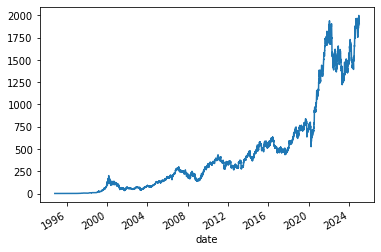

In [ ]:
# plots the values in the Close column
df['close'].plot()

In [19]:
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close'], dtype='object')

In [27]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df

               open     high      low    close
date                                          
1994-11-03     0.88     0.88     0.88     0.88
1994-11-15     0.87     0.87     0.87     0.87
1994-11-16     0.87     0.87     0.87     0.87
1994-11-17     0.87     0.87     0.87     0.87
1994-11-22     0.90     0.93     0.90     0.92
...             ...      ...      ...      ...
2024-12-19  1934.00  1959.75  1920.00  1946.20
2024-12-20  1975.15  1979.95  1911.25  1922.15
2024-12-23  1930.05  1940.00  1909.00  1924.30
2024-12-24  1927.05  1942.00  1840.00  1909.05
2024-12-26  1909.05  1919.75  1902.30  1907.40

[7435 rows x 4 columns]

In [42]:

df['month']=df.index.month
df

            Unnamed: 0     open     high      low    close  month
date                                                             
1994-11-03           0     0.88     0.88     0.88     0.88     11
1994-11-15           1     0.87     0.87     0.87     0.87     11
1994-11-16           2     0.87     0.87     0.87     0.87     11
1994-11-17           3     0.87     0.87     0.87     0.87     11
1994-11-22           4     0.90     0.93     0.90     0.92     11
...                ...      ...      ...      ...      ...    ...
2024-12-19        7430  1934.00  1959.75  1920.00  1946.20     12
2024-12-20        7431  1975.15  1979.95  1911.25  1922.15     12
2024-12-23        7432  1930.05  1940.00  1909.00  1924.30     12
2024-12-24        7433  1927.05  1942.00  1840.00  1909.05     12
2024-12-26        7434  1909.05  1919.75  1902.30  1907.40     12

[7435 rows x 6 columns]

In [26]:
df.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close'], dtype='object')

In [28]:
df['date']=pd.to_datetime(df['date'])
df.dtypes

Unnamed: 0             int64
date          datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
dtype: object

In [ ]:
df['month']=df['date'].dt.strftime('%Y-%b')
df

,Unnamed: 0,date,open,high,low,close,month
0,0,1994-11-03,0.88,0.88,0.88,0.88,1994-Nov
1,1,1994-11-15,0.87,0.87,0.87,0.87,1994-Nov
2,2,1994-11-16,0.87,0.87,0.87,0.87,1994-Nov
3,3,1994-11-17,0.87,0.87,0.87,0.87,1994-Nov
4,4,1994-11-22,0.90,0.93,0.90,0.92,1994-Nov
...,...,...,...,...,...,...,...
7430,7430,2024-12-19,1934.00,1959.75,1920.00,1946.20,2024-Dec
7431,7431,2024-12-20,1975.15,1979.95,1911.25,1922.15,2024-Dec
7432,7432,2024-12-23,1930.05,1940.00,1909.00,1924.30,2024-Dec
7433,7433,2024-12-24,1927.05,1942.00,1840.00,1909.05,2024-Dec


In [49]:
df['returns']=df['close'].pct_change()
df['returns']

date
1994-11-03         NaN
1994-11-15   -0.011364
1994-11-16    0.000000
1994-11-17    0.000000
1994-11-22    0.057471
                ...   
2024-12-19   -0.016649
2024-12-20   -0.012357
2024-12-23    0.001119
2024-12-24   -0.007925
2024-12-26   -0.000864
Name: returns, Length: 7435, dtype: float64

<AxesSubplot:xlabel='month'>

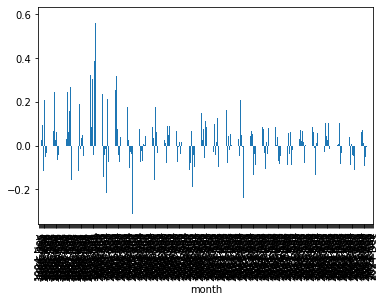

In [18]:
df_first=df.drop_duplicates(subset='month',keep='first')
df_last=df.drop_duplicates(subset='month',keep='last')
df_month=pd.concat([df_first,df_last])

df_month=df_month.sort_values(by='date',ascending=True)

df_month['m%']=df_month['close'].pct_change()
df_month.head()
df_month_change=df_month.drop_duplicates(subset='month',keep='last')[['month','m%']]
df_month_change.head()
df_month_change=df_month_change.set_index('month')
df_month_change['m%'].plot(kind='bar')

<AxesSubplot:xlabel='year'>

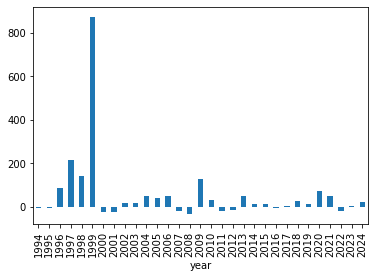

In [24]:
df['year']=df['date'].dt.year
df_first=df.drop_duplicates(subset='year',keep='first')
df_last=df.drop_duplicates(subset='year',keep='last')
df_year=pd.concat([df_first,df_last])

df_year=df_year.sort_values(by='date',ascending=True)

df_year['y%']=df_year['close'].pct_change()*100
df_year.head()
df_year_change=df_year.drop_duplicates(subset='year',keep='last')[['year','close','y%']]
df_year_change.head()
df_year_change=df_year_change.set_index('year')
df_year_change['y%'].plot(kind='bar')


In [23]:
df_year_change

,close,y%
year,,
1994,0.84,-0.045455
1995,0.80,-0.047619
1996,1.50,0.875000
1997,4.85,2.149351
1998,11.59,1.399586
1999,113.03,8.752373
2000,88.97,-0.271156
2001,63.81,-0.269908
2002,74.58,0.179503
